In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.StressEnergyTensor
using Plots

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
bubbles = Bubbles([Bubble(Point3(0., 0., -d / 2) , R), Bubble(Point3(0., 0., d / 2), R)])
bubbles

Bubbles(Bubble[Bubble(Point3([0.0, 0.0, -1.2]), 2.0), Bubble(Point3([0.0, 0.0, 1.2]), 2.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Vec3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 1 method)

In [4]:
k_0

1.9634954084936207

In [5]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

# Computing Analytically

comparing $$\tilde{(\partial_i\phi\partial_j\phi)}(k\hat{z})$$

For different i, j

In [6]:
ΔV = 1.
analytic_ii_integral = @. (4 * ΔV / (3 * ks)) * π * R^2 * sin(R * ks + d * ks / 2)

1000-element Vector{Float64}:
 50.15767486229104
 49.45531016706393
 48.69330137174879
 47.873402635005945
 46.99749779530277
 46.06759519057977
 45.0858221420004
 44.0544191183294
 42.97573359842899
 41.852213650250185
  ⋮
 -0.41096408773421805
 -0.3627860208598843
 -0.31329933707875657
 -0.26269815425219095
 -0.21118051461138443
 -0.15894761132980714
 -0.10620300445467072
 -0.05315182924662037
 -2.0900638705448165e-15

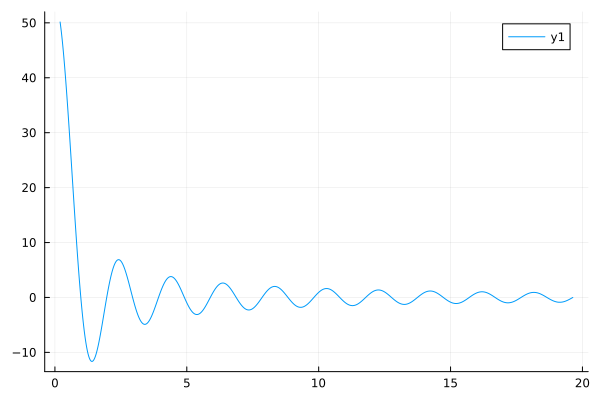

In [7]:
plot(ks, analytic_ii_integral)

# Computing Numerically

In [8]:
import EnvelopeApproximation.StressEnergyTensor: TensorDirection, surface_integral
tensor_directions = Vector{TensorDirection}([:trace, (:x, :x), (:y, :y), (:z, :z)])
numerical_T = surface_integral(k_vecs, bubbles, tensor_directions, 10, 10, ΔV; rtol=1e-3)

1000×4 Matrix{ComplexF64}:
    50.1577+3.88578e-16im  …     12.0147+6.10623e-16im
    49.4553+1.22125e-15im        11.6986+6.66134e-16im
    48.6933+8.88178e-16im        11.3565+6.66134e-16im
    47.8734+1.11022e-15im        10.9895+7.77156e-16im
    46.9975+5.55112e-16im        10.5986+1.11022e-16im
    46.0676+9.99201e-16im  …     10.1852+8.88178e-16im
    45.0858+5.55112e-16im        9.75027+1.11022e-15im
    44.0544+5.55112e-16im        9.29524+8.88178e-16im
    42.9757+1.22125e-15im        8.82145+9.99201e-16im
    41.8522+1.44329e-15im         8.3303+1.11022e-15im
           ⋮               ⋱  
  -0.410969-7.66054e-15im      -0.345148-4.92661e-15im
   -0.36279-4.71845e-15im      -0.295929-3.2474e-15im
  -0.313303-1.02141e-14im      -0.245562-3.91354e-15im
  -0.262701-5.05151e-15im      -0.194244-3.13638e-15im
  -0.211183-7.99361e-15im  …   -0.142175-3.16414e-15im
   -0.15895-1.06859e-14im     -0.0895587-4.44089e-15im
  -0.106204-6.43929e-15im     -0.0365989-4.55191e-15im
 -0.0531

In [9]:
numerical_T

1000×4 Matrix{ComplexF64}:
    50.1577+3.88578e-16im  …     12.0147+6.10623e-16im
    49.4553+1.22125e-15im        11.6986+6.66134e-16im
    48.6933+8.88178e-16im        11.3565+6.66134e-16im
    47.8734+1.11022e-15im        10.9895+7.77156e-16im
    46.9975+5.55112e-16im        10.5986+1.11022e-16im
    46.0676+9.99201e-16im  …     10.1852+8.88178e-16im
    45.0858+5.55112e-16im        9.75027+1.11022e-15im
    44.0544+5.55112e-16im        9.29524+8.88178e-16im
    42.9757+1.22125e-15im        8.82145+9.99201e-16im
    41.8522+1.44329e-15im         8.3303+1.11022e-15im
           ⋮               ⋱  
  -0.410969-7.66054e-15im      -0.345148-4.92661e-15im
   -0.36279-4.71845e-15im      -0.295929-3.2474e-15im
  -0.313303-1.02141e-14im      -0.245562-3.91354e-15im
  -0.262701-5.05151e-15im      -0.194244-3.13638e-15im
  -0.211183-7.99361e-15im  …   -0.142175-3.16414e-15im
   -0.15895-1.06859e-14im     -0.0895587-4.44089e-15im
  -0.106204-6.43929e-15im     -0.0365989-4.55191e-15im
 -0.0531

In [10]:
numerical_ii_integral = numerical_T |> x -> x[:, 1] |> real

1000-element Vector{Float64}:
 50.157674862291046
 49.455310167063914
 48.69330137174879
 47.87340263500592
 46.99749779530275
 46.0675951905798
 45.08582214200041
 44.05441911832936
 42.975733598428995
 41.85221365025018
  ⋮
 -0.41096884789842364
 -0.3627902633887511
 -0.3133030361088831
 -0.26270128564451756
 -0.21118305607751248
 -0.15894954255300092
 -0.10620430720508336
 -0.053152487490096254
  7.060001429396695e-15

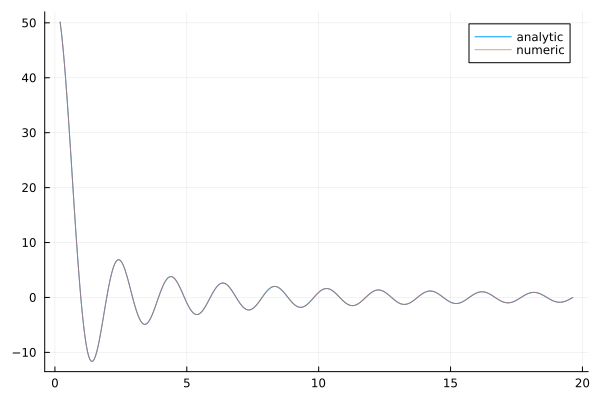

In [11]:
plot(ks, analytic_ii_integral, label="analytic")
plot!(ks, numerical_ii_integral, label="numeric", alpha=0.7)

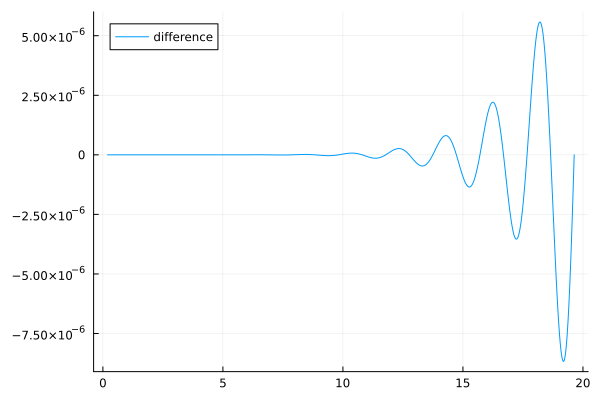

In [12]:
plot(ks, numerical_ii_integral - analytic_ii_integral, label="difference")

# Comparing z, z component

In [13]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

In [14]:
analytic_zz_integral = @. 4π * ΔV / 3 / ks^3 * (d * ks + (2 * ks * R * cos(ks * R) - (2 - ks ^2 * R ^ 2) * sin(ks * R)) * cos(d * ks / 2) - (2 * ks * R * sin(ks * R) + (2 - ks ^ 2 * R ^ 2) * cos(ks * R)) * sin(ks * d / 2))

1000-element Vector{Float64}:
 12.014711412774016
 11.698567044742866
 11.356480931012376
 10.98947622903871
 10.598649887163068
 10.185169191970578
  9.750268096131444
  9.295243338677393
  8.8214503703372
  8.330299097183236
  ⋮
 -0.34513691933676965
 -0.2959183638802855
 -0.2455517119744028
 -0.19423404513063106
 -0.14216572596095114
 -0.08954961836159708
 -0.0365902995830059
  0.01650673275991794
  0.06953585566980396

In [15]:
numeric_zz_integral = numerical_T |> x -> x[:, 4] |> real

1000-element Vector{Float64}:
 12.014711412774009
 11.69856704474284
 11.356480931012387
 10.989476229038715
 10.598649887163052
 10.185169191970564
  9.750268096131451
  9.295243338677405
  8.821450370337224
  8.330299097183232
  ⋮
 -0.34514795072444265
 -0.29592907860204454
 -0.24556207209839864
 -0.19424401358508733
 -0.1421752666984995
 -0.08955869652228425
 -0.03659888165528416
  0.016498678780892048
  0.06952836012722287

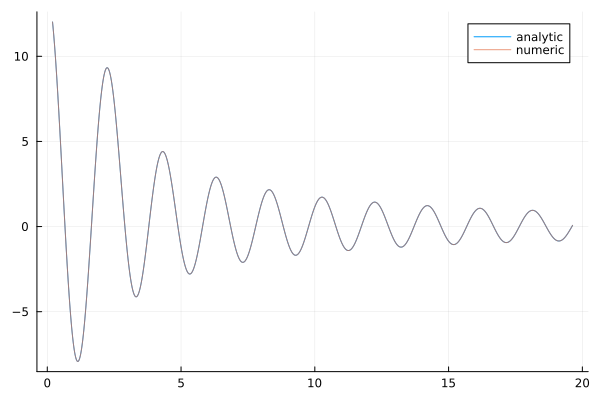

In [16]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numeric_zz_integral, label="numeric", alpha=0.7)

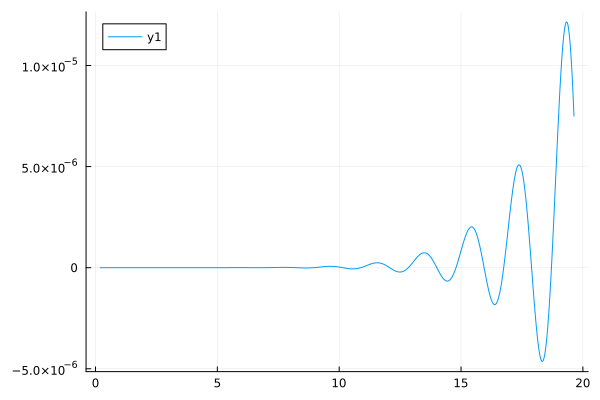

In [17]:
plot(ks, analytic_zz_integral - numeric_zz_integral)

# comparing xx integral

In [18]:
analytic_xx_integral = @. -2π * ΔV / (3 * ks ^ 3) * (d * ks + 2 * (ks * R * cos(ks * R) - sin(ks * R)) * cos(d * ks / 2) - 2 * (ks * R * sin(ks * R) + cos(ks * R)) * sin(d * ks / 2))

1000-element Vector{Float64}:
 19.071481724758524
 18.87837156116055
 18.66841022036821
 18.441963202983615
 18.199423954069854
 17.94121299930461
 17.667777022934473
 17.379587889826002
 17.077141614045892
 16.76095727653346
  ⋮
 -0.03291358419872146
 -0.03343382848979387
 -0.03387381255217544
 -0.034232054560779934
 -0.03450739432521368
 -0.03469899648410203
 -0.03480635243583091
 -0.034829281003267626
 -0.034767927834901506

In [19]:
numeric_xx_integral = numerical_T |> x -> x[:, 2] |> real

1000-element Vector{Float64}:
 19.071481724758513
 18.87837156116054
 18.6684102203682
 18.44196320298361
 18.19942395406985
 17.941212999304607
 17.66777702293448
 17.379587889825995
 17.07714161404588
 16.76095727653347
  ⋮
 -0.03291044858699045
 -0.03343059239335319
 -0.03387048200524209
 -0.03422863602971546
 -0.03450389468950621
 -0.03469542301535827
 -0.03480271277489959
 -0.03482558313549459
 -0.03476418006360803

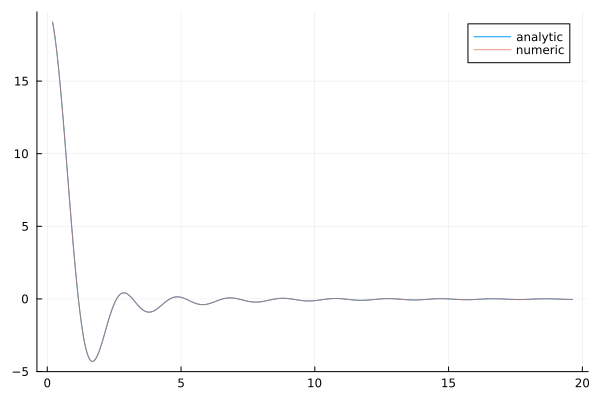

In [20]:
plot(ks, analytic_xx_integral, label="analytic")
plot!(ks, numeric_xx_integral, label="numeric", alpha=0.7)

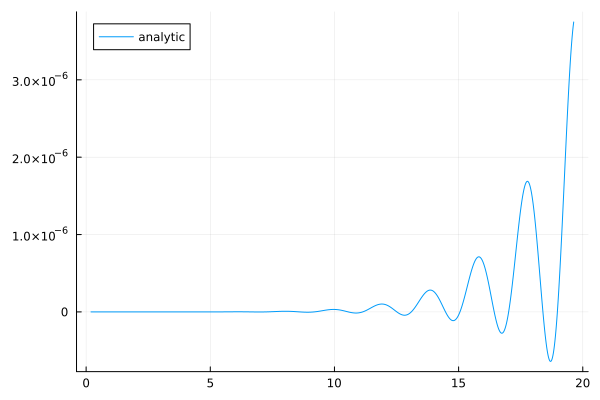

In [21]:
plot(ks, numeric_xx_integral - analytic_xx_integral, label="analytic")

# Comparing xx and yy

In [22]:
numeric_yy_integral = numerical_T |> x -> x[:, 3] |> real

1000-element Vector{Float64}:
 19.071481724758517
 18.878371561160545
 18.6684102203682
 18.441963202983622
 18.199423954069854
 17.94121299930461
 17.667777022934484
 17.379587889826002
 17.07714161404589
 16.760957276533468
  ⋮
 -0.032910448586990555
 -0.03343059239335318
 -0.03387048200524212
 -0.034228636029715376
 -0.03450389468950607
 -0.034695423015358356
 -0.034802712774899734
 -0.03482558313549469
 -0.034764180063608

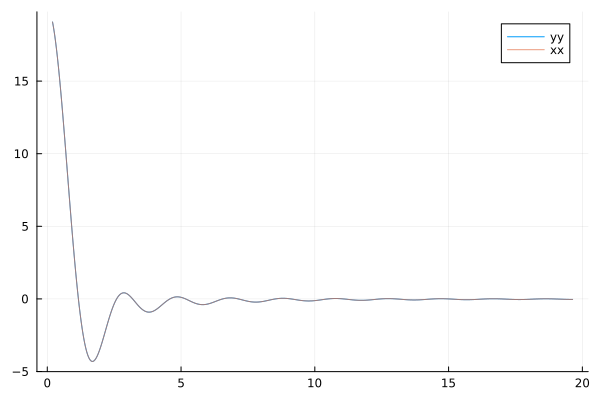

In [23]:
plot(ks, numeric_yy_integral, label="yy")
plot!(ks, numeric_xx_integral, label="xx", alpha=0.7)

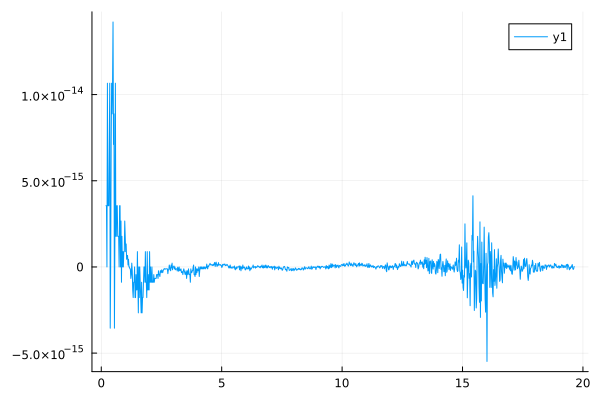

In [24]:
plot(ks, numeric_yy_integral - numeric_xx_integral)

# Volume Integration

## numerical computation

In [25]:
import EnvelopeApproximation.StressEnergyTensor: potential_integral
n_ϕ = n_μ = 10
ΔV = 1.
numeric_integral = potential_integral(k_vecs, bubbles, n_ϕ, n_μ, ΔV, rtol=1e-3) .|> real

1000-element Vector{Float64}:
 -57.21444517427555
 -56.63511468348162
 -56.00523066110459
 -55.325889608950845
 -54.59827186220956
 -53.82363899791381
 -53.00333106880346
 -52.13876366947801
 -51.23142484213763
 -50.282871829600424
   ⋮
   0.09874180613881739
   0.10030257818649177
   0.10162256761498056
   0.10269732878525162
   0.10352338096833098
   0.10409821792900356
   0.10442031371873918
   0.10448912467054747
   0.10430508760305368

## Analytical computation

In [26]:
function single_bubble_contribution(k)
    return (-ΔV) * 8 * π * cos(k * d / 2) * (sin(k * R) - (k * R) * cos(k * R)) / (k ^ 3)
end

single_bubble_contribution (generic function with 1 method)

In [27]:
function intersection_contribution(k)
    res = (π*d*k - 2*(π*R*k*cos(R*k) - π*sin(R*k))*cos(1/2*d*k) - 2*(π*R*k*sin(R*k) + π*cos(R*k))*sin(1/2*d*k))/k^3
    return 2 * (-ΔV) * real(res)
end

intersection_contribution (generic function with 1 method)

In [28]:
analytic_volume_integral = @. single_bubble_contribution(ks) - intersection_contribution(ks)

1000-element Vector{Float64}:
 -57.21444517427557
 -56.63511468348162
 -56.00523066110464
 -55.32588960895085
 -54.59827186220958
 -53.82363899791381
 -53.00333106880342
 -52.138763669477996
 -51.23142484213767
 -50.28287182960035
   ⋮
   0.0987407525961645
   0.10030148546938163
   0.10162143765652634
   0.10269616368233975
   0.10352218297564103
   0.10409698945230605
   0.10441905730749268
   0.1044878430098029
   0.10430378350470453

## Comparison

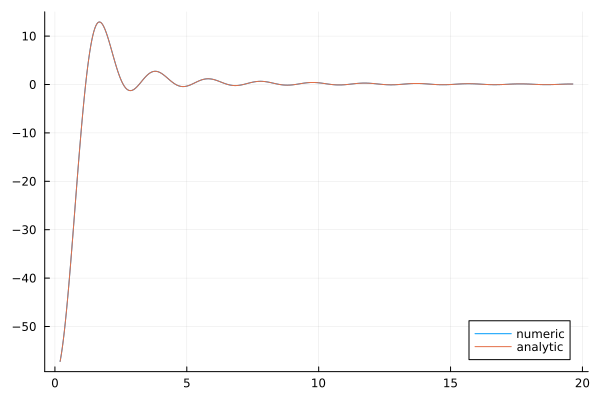

In [29]:
plot(ks, numeric_integral, label="numeric")
plot!(ks, analytic_volume_integral, label="analytic")

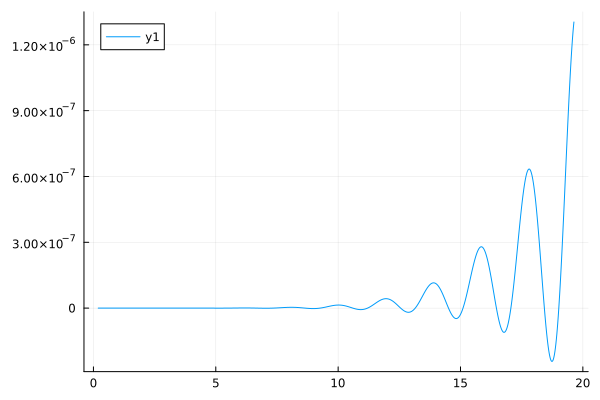

In [30]:
plot(ks, numeric_integral - analytic_volume_integral)

# Computing $T_{\mu\nu}$ and saving the data

In [31]:
tensor_directions

4-element Vector{Union{Symbol, Tuple{Symbol, Symbol}}}:
 :trace
 (:x, :x)
 (:y, :y)
 (:z, :z)

In [32]:
numerical_T

1000×4 Matrix{ComplexF64}:
    50.1577+3.88578e-16im  …     12.0147+6.10623e-16im
    49.4553+1.22125e-15im        11.6986+6.66134e-16im
    48.6933+8.88178e-16im        11.3565+6.66134e-16im
    47.8734+1.11022e-15im        10.9895+7.77156e-16im
    46.9975+5.55112e-16im        10.5986+1.11022e-16im
    46.0676+9.99201e-16im  …     10.1852+8.88178e-16im
    45.0858+5.55112e-16im        9.75027+1.11022e-15im
    44.0544+5.55112e-16im        9.29524+8.88178e-16im
    42.9757+1.22125e-15im        8.82145+9.99201e-16im
    41.8522+1.44329e-15im         8.3303+1.11022e-15im
           ⋮               ⋱  
  -0.410969-7.66054e-15im      -0.345148-4.92661e-15im
   -0.36279-4.71845e-15im      -0.295929-3.2474e-15im
  -0.313303-1.02141e-14im      -0.245562-3.91354e-15im
  -0.262701-5.05151e-15im      -0.194244-3.13638e-15im
  -0.211183-7.99361e-15im  …   -0.142175-3.16414e-15im
   -0.15895-1.06859e-14im     -0.0895587-4.44089e-15im
  -0.106204-6.43929e-15im     -0.0365989-4.55191e-15im
 -0.0531

In [33]:
numerical_Tij = Dict("T_xx" => numeric_xx_integral - numeric_integral, "T_yy" => numeric_yy_integral - numeric_integral, "T_zz" => numeric_zz_integral - numeric_integral)
analytic_Tij = Dict("T_xx" => analytic_xx_integral - analytic_volume_integral, 
                    "T_yy" => analytic_xx_integral - analytic_volume_integral, 
                    "T_zz" => analytic_zz_integral - analytic_volume_integral)

Dict{String, Vector{Float64}} with 3 entries:
  "T_zz" => [69.2292, 68.3337, 67.3617, 66.3154, 65.1969, 64.0088, 62.7536, 61.…
  "T_xx" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…
  "T_yy" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…

In [34]:
k_vecs .|> collect

1000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.19634954084936207]
 [0.0, 0.0, 0.21580760345605562]
 [0.0, 0.0, 0.23526566606274915]
 [0.0, 0.0, 0.2547237286694427]
 [0.0, 0.0, 0.27418179127613623]
 [0.0, 0.0, 0.29363985388282976]
 [0.0, 0.0, 0.31309791648952334]
 [0.0, 0.0, 0.33255597909621687]
 [0.0, 0.0, 0.3520140417029104]
 [0.0, 0.0, 0.3714721043096039]
 ⋮
 [0.0, 0.0, 19.47928958408266]
 [0.0, 0.0, 19.498747646689356]
 [0.0, 0.0, 19.518205709296048]
 [0.0, 0.0, 19.53766377190274]
 [0.0, 0.0, 19.557121834509434]
 [0.0, 0.0, 19.576579897116126]
 [0.0, 0.0, 19.59603795972282]
 [0.0, 0.0, 19.615496022329516]
 [0.0, 0.0, 19.634954084936208]

In [35]:
complete_data = Dict("numerical_T" => numerical_Tij, 
                     "analytical_T" => analytic_Tij, 
                     "R" => R, 
                     "d" => d, 
                     "ΔV" => ΔV, 
                     "ks" => k_vecs .|> collect)

Dict{String, Any} with 6 entries:
  "ks"           => [[0.0, 0.0, 0.19635], [0.0, 0.0, 0.215808], [0.0, 0.0, 0.23…
  "analytical_T" => Dict("T_zz"=>[69.2292, 68.3337, 67.3617, 66.3154, 65.1969, …
  "numerical_T"  => Dict("T_zz"=>[69.2292, 68.3337, 67.3617, 66.3154, 65.1969, …
  "R"            => 2.0
  "ΔV"           => 1.0
  "d"            => 2.4

In [36]:
using JSON
open("double_bubble_benchmark_data.json", "w") do f
    JSON.print(f, complete_data)
end